In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# import re
# from bs4 import BeautifulSoup
# from nltk.tokenize import WordPunctTokenizer
# tok = WordPunctTokenizer()

# pat1 = r'@[A-Za-z0-9_]+'
# pat2 = r'https?://[^ ]+'
# combined_pat = r'|'.join((pat1, pat2))
# www_pat = r'www.[^ ]+'
# negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
#                 "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
#                 "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
#                 "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
#                 "mustn't":"must not"}
# neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

# def tweet_cleaner_updated(text):
#     soup = BeautifulSoup(text, 'lxml')
#     souped = soup.get_text()
#     try:
#         bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
#     except:
#         bom_removed = souped
#     stripped = re.sub(combined_pat, '', bom_removed)
#     stripped = re.sub(www_pat, '', stripped)
#     lower_case = stripped.lower()
#     neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
#     letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
#     # During the letters_only process two lines above, it has created unnecessay white spaces,
#     # I will tokenize and join together to remove unneccessary white spaces
#     words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
#     return (" ".join(words)).strip()

In [3]:
# df = pd.read_csv("train.csv",header=None, names=['sentiment','text'],encoding='ISO-8859-1')
# # df['sentiment'] = df['sentiment'].map({0: 0, 4: 1})
# df.head(100)

In [4]:
# %%time
# print ("Cleaning the tweets...\n")
# clean_tweet_texts = []
# for i in range(1,len(df)):
#     if( (i+1)%100000 == 0 ):
#         print ("Tweets %d of %d has been processed" % ( i+1, len(df) ))                                                                    
#     clean_tweet_texts.append([tweet_cleaner_updated(df['text'][i]),df['sentiment'][i]])
# clean_tweet_texts

In [5]:
# clean_df = pd.DataFrame(clean_tweet_texts,columns=['text','sentiment'])
# # df.sentiment[:99989]
# # clean_df

In [6]:
# # clean_df['sentiment'] = df.sentiment
# clean_df.to_csv('clean_tweet2.csv',encoding='utf-8')

In [7]:
csv = 'clean_tweet2.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,text,sentiment
0,is so sad for my apl friend,0
1,missed the new moon trailer,0
2,omg its already,1
3,omgaga im sooo im gunna cry ve been at this de...,0
4,think mi bf is cheating on me,0


After cleaning the tweets with the updated cleaner function, I took another look at the info()

In [8]:
my_df.shape

(99988, 2)

In [9]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99988 entries, 0 to 99987
Data columns (total 2 columns):
text         99523 non-null object
sentiment    99988 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


In [10]:
my_df[my_df.isnull().any(axis=1)].head()

,text,sentiment
225,NaN,1
228,NaN,1
233,NaN,0
252,NaN,0
694,NaN,1


In [11]:
np.sum(my_df.isnull().any(axis=1))

465

In [12]:
my_df.isnull().any(axis=0)

text          True
sentiment    False
dtype: bool

In [13]:
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99523 entries, 0 to 99522
Data columns (total 2 columns):
text         99523 non-null object
sentiment    99523 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [14]:
my_df.shape

(99523, 2)

# Word Cloud

For the word cloud, I used the python library wordcloud.

In [15]:
neg_tweets = my_df[my_df.sentiment == 0]
# neg_tweets

# neg_tweets = my_df['sentiment' == 0]
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
# neg_string
neg_string = pd.Series(neg_string).str.cat(sep=' ')
# neg_string

World Cloud for negative words

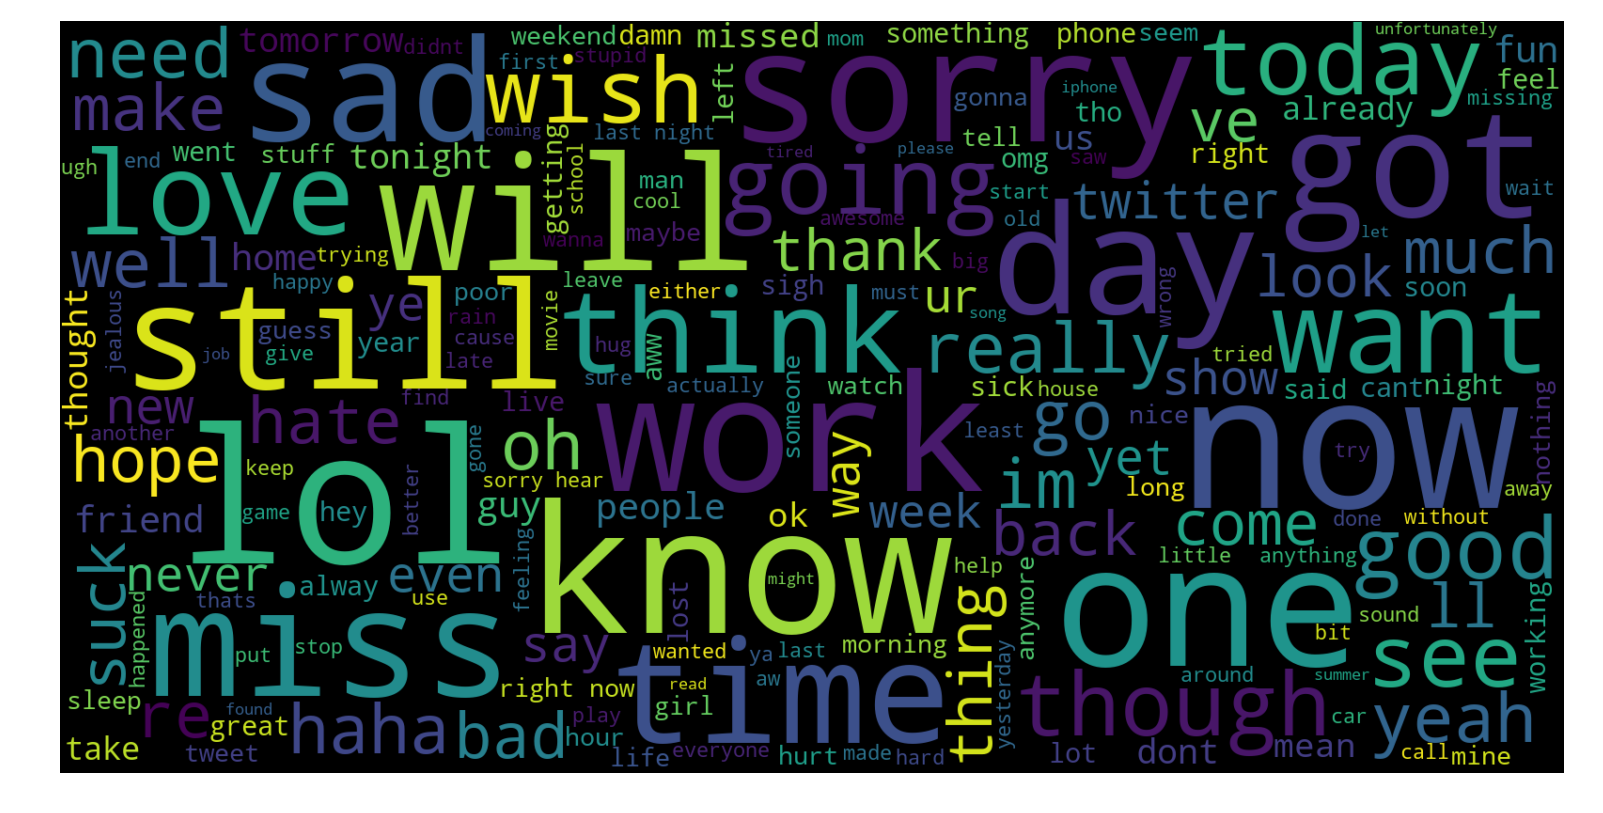

In [16]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [17]:
for t in neg_tweets.text[:200]:
    if 'love' in t:
        print (t)

friends are leaving me cause of this stupid love
love you guys so much that it hurts
jus got hom fr tda funeral so sad cried so much times much love grandpa never got to say my last goodbye to him
miss my love jamie


OK, even though the tweets contain the word "love", in these cases it is negative sentiment because the tweet has mixed emotions like "love" but "miss". Or sometimes used in a sarcastic way.

In [18]:
pos_tweets = my_df[my_df.sentiment == 1]
pos_string = []
for t in pos_tweets.text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

World Cloud for positive words

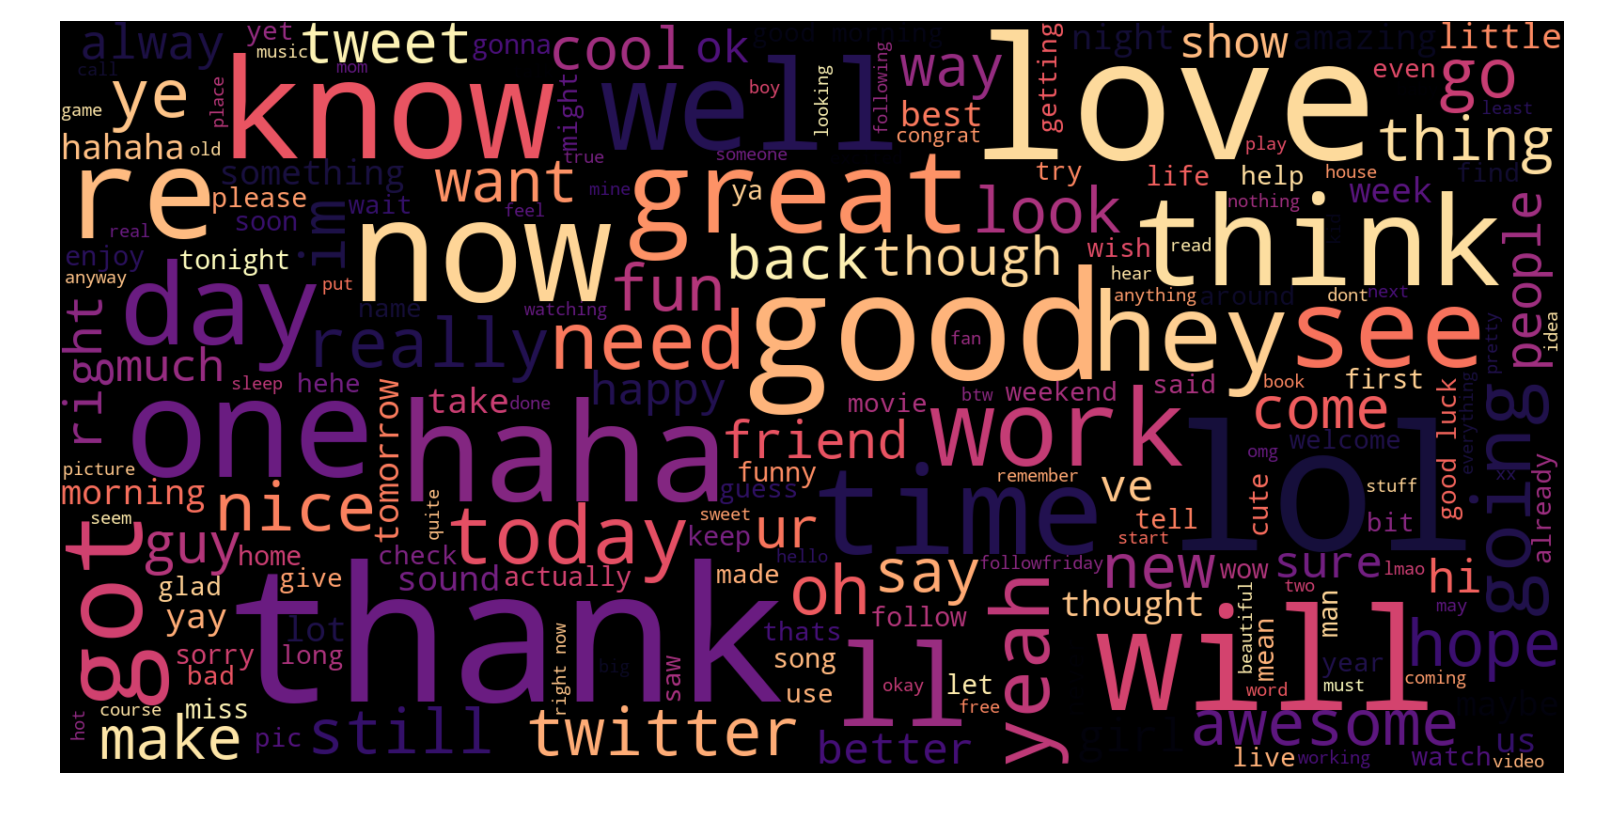

In [19]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

world cloud for all data

In [20]:
all_string = []
for t in my_df.text:
    all_string.append(t)
all_string = pd.Series(all_string).str.cat(sep=' ')

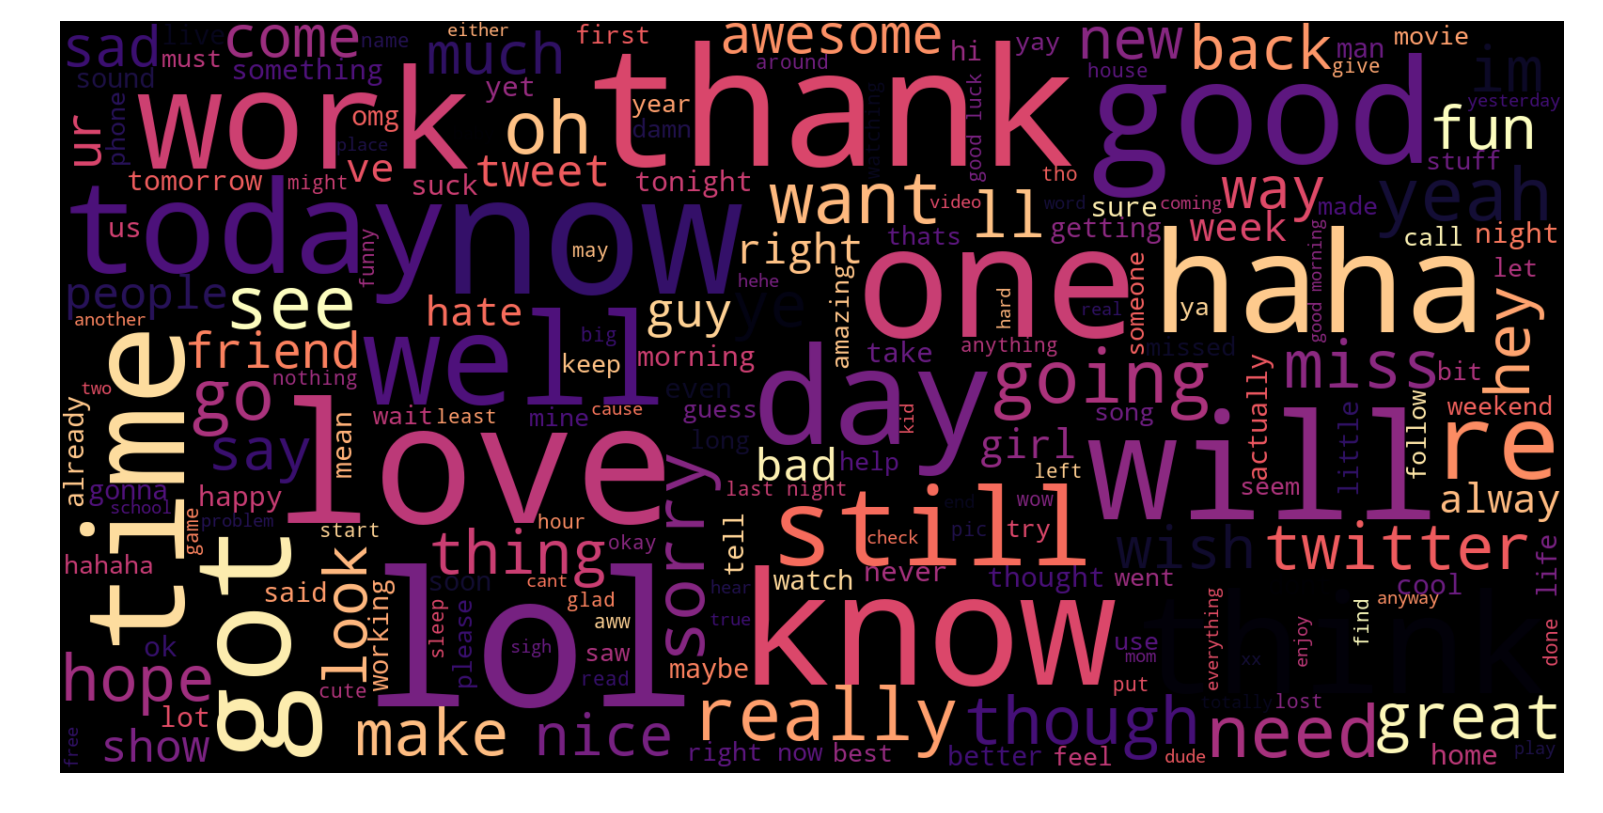

In [21]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(all_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [22]:
del pos_tweets, pos_string, neg_tweets, neg_string, wordcloud, all_string #, df

## Preparion for data visualisation

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(my_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [16]:
cvec.get_feature_names()

['aa',
 'aaa',
 'aaaa',
 'aaaaa',
 'aaaaaa',
 'aaaaaaaaa',
 'aaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaah',
 'aaaaaaaaaaarggggggggggghhhhhhhhh',
 'aaaaaaaahhhhh',
 'aaaaaaah',
 'aaaaaaahhh',
 'aaaaaaalcohol',
 'aaaaaah',
 'aaaaaahh',
 'aaaaaahhhhhhhh',
 'aaaaaakkkh',
 'aaaaaand',
 'aaaaah',
 'aaaaahhhh',
 'aaaaahhhhh',
 'aaaaahhhhhh',
 'aaaaand',
 'aaaaaw',
 'aaaages',
 'aaaah',
 'aaaahahahahahahahahahahahahahahahah',
 'aaaahh',
 'aaaahhhh',
 'aaaahhhhhhhh',
 'aaaahhhhhhhhh',
 'aaaaiieee',
 'aaaall',
 'aaaalll',
 'aaaamy',
 'aaaand',
 'aaaaoooo',
 'aaaarrgghhhhhhhh',
 'aaaarses',
 'aaaaw',
 'aaaaww',
 'aaaayyyyyy',
 'aaages',
 'aaah',
 'aaahahaha',
 'aaahh',
 'aaahhh',
 'aaahhhh',
 'aaahhhhh',
 'aaahhhhhh',
 'aaand',
 'aaargh',
 'aaarrggghhh',
 'aaarrrgggghhh',
 'aaarrrrg',
 'aaarrrrrrrrr',
 'aaaw',
 'aaaww',
 'aaawww',
 'aabangan',
 'aabhar',
 'aabot',
 'aachen',
 'aaeeeaaaa',
 'aagenealogy',
 'aah',
 'aahahahha',
 'aahh',
 'aahha',
 'aahhh',
 'aahhhh',
 'aahhhhh',
 'aahhhhhh',
 'aahmhm',


In [17]:
len(cvec.get_feature_names())

50093

OK it looks like count vectorizer has extracted 50093 words out of the corpus.

In [18]:
neg_doc_matrix = cvec.transform(my_df[my_df.sentiment == 0].text)
pos_doc_matrix = cvec.transform(my_df[my_df.sentiment == 1].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df

,0,1
aa,12,7
aaa,9,2
aaaa,1,2
aaaaa,2,1
aaaaaa,1,1
...,...,...
zzzzzz,0,1
zzzzzzzz,1,0
zzzzzzzzzzz,1,0
zzzzzzzzzzzz,1,1


In [19]:
document_matrix = cvec.transform(my_df.text)

In [20]:
my_df[my_df.sentiment == 0].tail()

,text,sentiment
99509,cuz you big burly man hahahahahahahahaha,0
99515,the foot is really bad like the worst it ever ...,0
99517,it took me waaay too long to get your message ...,0
99518,seems like repeating problem hope you re able ...,0
99520,ya thought so,0


In [21]:
my_df[my_df.sentiment == 1].tail()

,text,sentiment
99514,afternoon jim hows you,1
99516,have fun doing health safety just switch off a...,1
99519,arrrr we both replied to each other over diffe...,1
99521,yes yes glad you had more fun with me,1
99522,haha yes you do,1


In [23]:
neg_data = my_df[my_df.sentiment == 0]
# neg_data
pos_data = my_df[my_df.sentiment == 1]

data = neg_data.append(pos_data)

In [24]:
%%time
neg_batches = np.linspace(0,len(neg_data),100).astype(int)
neg_batches
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(neg_batches)-2):
        print (neg_batches[i+1],"entries' term freuquency calculated")
    i += 1

437 entries' term freuquency calculated
4813 entries' term freuquency calculated
9188 entries' term freuquency calculated
13564 entries' term freuquency calculated
17940 entries' term freuquency calculated
22315 entries' term freuquency calculated
26691 entries' term freuquency calculated
31067 entries' term freuquency calculated
35442 entries' term freuquency calculated
39818 entries' term freuquency calculated
43319 entries' term freuquency calculated
CPU times: user 5.71 s, sys: 7.6 s, total: 13.3 s
Wall time: 13.3 s


In [25]:
%%time
pos_batches = np.linspace(len(neg_data),len(data),100).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(pos_batches)-2):
        print (pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

43886 entries' term freuquency calculated
49563 entries' term freuquency calculated
55241 entries' term freuquency calculated
60918 entries' term freuquency calculated
66595 entries' term freuquency calculated
72272 entries' term freuquency calculated
77949 entries' term freuquency calculated
83626 entries' term freuquency calculated
89304 entries' term freuquency calculated
94981 entries' term freuquency calculated
99523 entries' term freuquency calculated
CPU times: user 7.6 s, sys: 10.1 s, total: 17.7 s
Wall time: 17.7 s


In [26]:
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df.head()

,0,1
aa,12,7
aaa,5,6
aaaa,0,3
aaaaa,1,2
aaaaaa,2,0


In [27]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
you,11097,18992,30089
the,13330,16682,30012
to,13196,16421,29617
it,8924,13400,22324
not,8010,10898,18908
and,7534,8912,16446
my,7010,6861,13871
that,5308,8384,13692
is,5870,6728,12598
for,5375,7198,12573


In [28]:
len(term_freq_df)

50093

In [29]:
term_freq_df.to_csv('term_freq_df2.csv',encoding='utf-8')

In [30]:
x = my_df.text
y = my_df.sentiment

In [31]:
from sklearn.model_selection import train_test_split
SEED = 2000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

In [32]:
print ("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_train),
                                                                             (len(x_train[y_train == 0]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == 1]) / (len(x_train)*1.))*100))
print ("Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_validation),
                                                                             (len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100,
                                                                            (len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100))
print ("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_test),
                                                                             (len(x_test[y_test == 0]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == 1]) / (len(x_test)*1.))*100))

Train set has total 97532 entries with 43.51% negative, 56.49% positive
Validation set has total 995 entries with 43.32% negative, 56.68% positive
Test set has total 996 entries with 45.38% negative, 54.62% positive


In [33]:
from textblob import TextBlob
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
%%time
tbresult = [TextBlob(i).sentiment.polarity for i in x_validation]
tbpred = [0 if n < 0 else 1 for n in tbresult]

CPU times: user 301 ms, sys: 6.35 ms, total: 307 ms
Wall time: 310 ms


In [35]:
conmat = np.array(confusion_matrix(y_validation, tbpred, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['positive', 'negative'],
                         columns=['predicted_positive','predicted_negative'])
print ("Accuracy Score: {0:.2f}%".format(accuracy_score(y_validation, tbpred)*100))
print ("-"*80)
print ("Confusion Matrix\n")
print (confusion)
print ("-"*80)
print ("Classification Report\n")
print (classification_report(y_validation, tbpred))

Accuracy Score: 63.12%
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_positive  predicted_negative
positive                 511                  53
negative                 314                 117
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

           0       0.69      0.27      0.39       431
           1       0.62      0.91      0.74       564

    accuracy                           0.63       995
   macro avg       0.65      0.59      0.56       995
weighted avg       0.65      0.63      0.59       995



In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time

In [37]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time

In [113]:
cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000,100001,10000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print ("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print ("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

In [114]:
count_vect = CountVectorizer(ngram_range=(1,2))

corpus = [
    'This is the first document.',
    'This is the second second document.',
]
X = count_vect.fit_transform(corpus)
print(X)
print(count_vect.get_feature_names())
['first document', 'is the', 'second document', 'second second', 'the first', 'the second', 'this is']

  (0, 11)	1
  (0, 3)	1
  (0, 8)	1
  (0, 1)	1
  (0, 0)	1
  (0, 12)	1
  (0, 4)	1
  (0, 9)	1
  (0, 2)	1
  (1, 11)	1
  (1, 3)	1
  (1, 8)	1
  (1, 0)	1
  (1, 12)	1
  (1, 4)	1
  (1, 5)	2
  (1, 10)	1
  (1, 7)	1
  (1, 6)	1
['document', 'first', 'first document', 'is', 'is the', 'second', 'second document', 'second second', 'the', 'the first', 'the second', 'this', 'this is']


['first document',
 'is the',
 'second document',
 'second second',
 'the first',
 'the second',
 'this is']

In [115]:
%%time
print ("RESULT FOR UNIGRAM WITHOUT STOP WORDS\n")
feature_result_wosw = nfeature_accuracy_checker(stop_words='english')

RESULT FOR UNIGRAM WITHOUT STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 10000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 73.07%
model is 16.38% more accurate than null accuracy
train and test time: 2.83s
--------------------------------------------------------------------------------
Validation result for 20000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 73.87%
model is 17.19% more accurate than null accuracy
train and test time: 2.98s
--------------------------------------------------------------------------------
Validation result for 30000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 74.37%
model is 17.69% more accurate than null accuracy
train and test time: 3.05s
--------------------------------------------------------------------------------
Validation result for 40000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 74.57%
model is 17.89% more accurate than null accuracy
train and test time: 3.29s
--------------------------------------------------------------------------------
Validation result for 50000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 74.97%
model is 18.29% more accurate than null accuracy
train and test time: 3.50s
--------------------------------------------------------------------------------
Validation result for 60000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 74.97%
model is 18.29% more accurate than null accuracy
train and test time: 3.44s
--------------------------------------------------------------------------------
Validation result for 70000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 74.97%
model is 18.29% more accurate than null accuracy
train and test time: 3.50s
--------------------------------------------------------------------------------
Validation result for 80000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 74.97%
model is 18.29% more accurate than null accuracy
train and test time: 3.32s
--------------------------------------------------------------------------------
Validation result for 90000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 74.97%
model is 18.29% more accurate than null accuracy
train and test time: 3.36s
--------------------------------------------------------------------------------
Validation result for 100000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 74.97%
model is 18.29% more accurate than null accuracy
train and test time: 3.32s
--------------------------------------------------------------------------------
CPU times: user 45.2 s, sys: 1.27 s, total: 46.5 s
Wall time: 32.7 s


In [116]:
%%time
print ("RESULT FOR UNIGRAM WITH STOP WORDS\n")
feature_result_ug = nfeature_accuracy_checker()

RESULT FOR UNIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 10000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.08%
model is 19.40% more accurate than null accuracy
train and test time: 4.97s
--------------------------------------------------------------------------------
Validation result for 20000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 75.98%
model is 19.30% more accurate than null accuracy
train and test time: 6.74s
--------------------------------------------------------------------------------
Validation result for 30000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.38%
model is 19.70% more accurate than null accuracy
train and test time: 6.15s
--------------------------------------------------------------------------------
Validation result for 40000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.28%
model is 19.60% more accurate than null accuracy
train and test time: 7.40s
--------------------------------------------------------------------------------
Validation result for 50000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.18%
model is 19.50% more accurate than null accuracy
train and test time: 7.11s
--------------------------------------------------------------------------------
Validation result for 60000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.18%
model is 19.50% more accurate than null accuracy
train and test time: 7.79s
--------------------------------------------------------------------------------
Validation result for 70000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.18%
model is 19.50% more accurate than null accuracy
train and test time: 6.79s
--------------------------------------------------------------------------------
Validation result for 80000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.18%
model is 19.50% more accurate than null accuracy
train and test time: 6.25s
--------------------------------------------------------------------------------
Validation result for 90000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.18%
model is 19.50% more accurate than null accuracy
train and test time: 6.51s
--------------------------------------------------------------------------------
Validation result for 100000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.18%
model is 19.50% more accurate than null accuracy
train and test time: 7.36s
--------------------------------------------------------------------------------
CPU times: user 1min 39s, sys: 3.16 s, total: 1min 42s
Wall time: 1min 7s


In [117]:
csv = 'term_freq_df2.csv'
term_freq_df = pd.read_csv(csv,index_col=0)
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
you,11097,18992,30089
the,13330,16682,30012
to,13196,16421,29617
it,8924,13400,22324
not,8010,10898,18908
and,7534,8912,16446
my,7010,6861,13871
that,5308,8384,13692
is,5870,6728,12598
for,5375,7198,12573


In [118]:
from sklearn.feature_extraction import text

a = frozenset(list(term_freq_df.sort_values(by='total', ascending=False).iloc[:10].index))
b = text.ENGLISH_STOP_WORDS
set(a).issubset(set(b))

True

In [119]:
my_stop_words = frozenset(list(term_freq_df.sort_values(by='total', ascending=False).iloc[:10].index))

In [120]:
%%time
print ("RESULT FOR UNIGRAM WITHOUT CUSTOM STOP WORDS (Top 10 frequent words)\n")
feature_result_wocsw = nfeature_accuracy_checker(stop_words=my_stop_words)

RESULT FOR UNIGRAM WITHOUT CUSTOM STOP WORDS (Top 10 frequent words)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 10000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 74.57%
model is 17.89% more accurate than null accuracy
train and test time: 4.59s
--------------------------------------------------------------------------------
Validation result for 20000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 74.57%
model is 17.89% more accurate than null accuracy
train and test time: 4.14s
--------------------------------------------------------------------------------
Validation result for 30000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 74.67%
model is 17.99% more accurate than null accuracy
train and test time: 5.78s
--------------------------------------------------------------------------------
Validation result for 40000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 75.18%
model is 18.49% more accurate than null accuracy
train and test time: 5.92s
--------------------------------------------------------------------------------
Validation result for 50000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 75.48%
model is 18.79% more accurate than null accuracy
train and test time: 6.11s
--------------------------------------------------------------------------------
Validation result for 60000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 75.48%
model is 18.79% more accurate than null accuracy
train and test time: 6.63s
--------------------------------------------------------------------------------
Validation result for 70000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 75.48%
model is 18.79% more accurate than null accuracy
train and test time: 6.77s
--------------------------------------------------------------------------------
Validation result for 80000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 75.48%
model is 18.79% more accurate than null accuracy
train and test time: 5.64s
--------------------------------------------------------------------------------
Validation result for 90000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 75.48%
model is 18.79% more accurate than null accuracy
train and test time: 5.44s
--------------------------------------------------------------------------------
Validation result for 100000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 75.48%
model is 18.79% more accurate than null accuracy
train and test time: 5.42s
--------------------------------------------------------------------------------
CPU times: user 1min 23s, sys: 2.47 s, total: 1min 26s
Wall time: 56.5 s


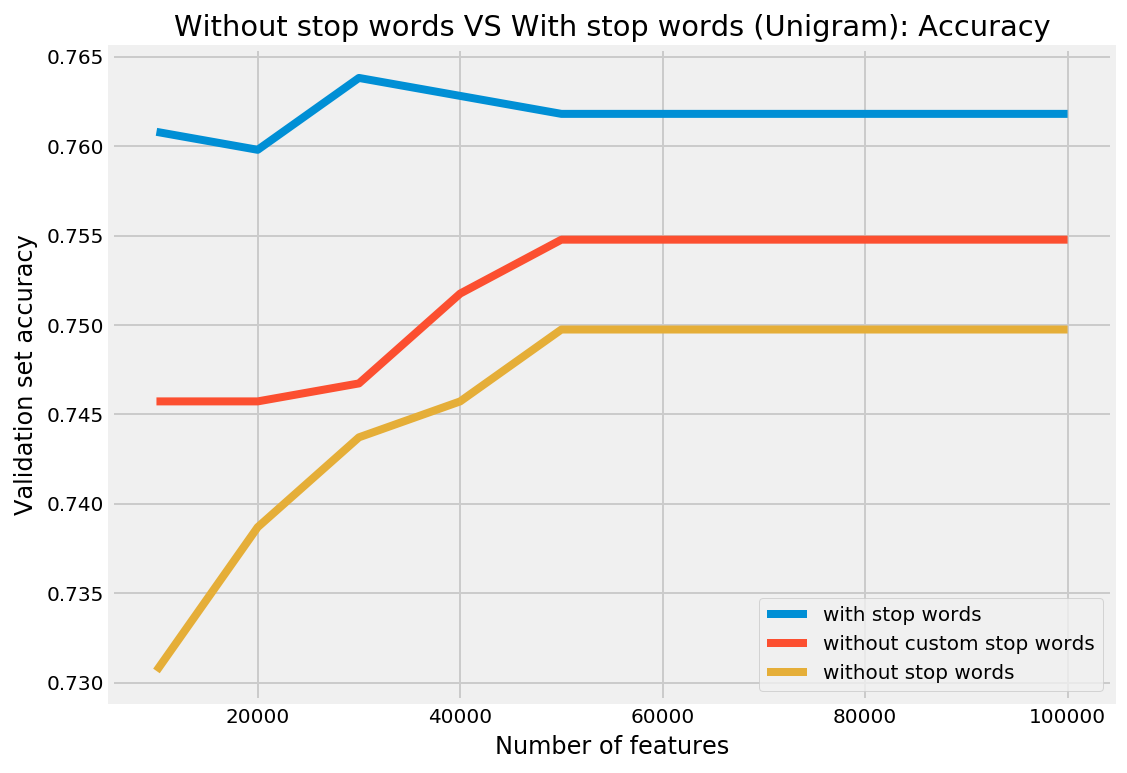

In [121]:
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug_wocsw = pd.DataFrame(feature_result_wocsw,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug_wosw = pd.DataFrame(feature_result_wosw,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='with stop words')
plt.plot(nfeatures_plot_ug_wocsw.nfeatures, nfeatures_plot_ug_wocsw.validation_accuracy,label='without custom stop words')
plt.plot(nfeatures_plot_ug_wosw.nfeatures, nfeatures_plot_ug_wosw.validation_accuracy,label='without stop words')
plt.title("Without stop words VS With stop words (Unigram): Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [97]:
%%time
print ("RESULT FOR BIGRAM WITH STOP WORDS\n")
feature_result_bg = nfeature_accuracy_checker(ngram_range=(1, 2))

RESULT FOR BIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 10000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 75.68%
model is 18.99% more accurate than null accuracy
train and test time: 13.42s
--------------------------------------------------------------------------------
Validation result for 20000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.48%
model is 19.80% more accurate than null accuracy
train and test time: 11.72s
--------------------------------------------------------------------------------
Validation result for 30000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.78%
model is 20.10% more accurate than null accuracy
train and test time: 10.36s
--------------------------------------------------------------------------------
Validation result for 40000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.28%
model is 19.60% more accurate than null accuracy
train and test time: 14.26s
--------------------------------------------------------------------------------
Validation result for 50000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.08%
model is 19.40% more accurate than null accuracy
train and test time: 17.91s
--------------------------------------------------------------------------------
Validation result for 60000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.08%
model is 19.40% more accurate than null accuracy
train and test time: 19.16s
--------------------------------------------------------------------------------
Validation result for 70000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 75.88%
model is 19.20% more accurate than null accuracy
train and test time: 19.09s
--------------------------------------------------------------------------------
Validation result for 80000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 75.78%
model is 19.10% more accurate than null accuracy
train and test time: 16.77s
--------------------------------------------------------------------------------
Validation result for 90000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.38%
model is 19.70% more accurate than null accuracy
train and test time: 15.80s
--------------------------------------------------------------------------------
Validation result for 100000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.48%
model is 19.80% more accurate than null accuracy
train and test time: 13.10s
--------------------------------------------------------------------------------
CPU times: user 3min 8s, sys: 6.88 s, total: 3min 15s
Wall time: 2min 31s


In [98]:
%%time
print ("RESULT FOR BIGRAM WITH STOP WORDS\n")
feature_result_tg = nfeature_accuracy_checker(ngram_range=(1, 3))

RESULT FOR BIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 10000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.38%
model is 19.70% more accurate than null accuracy
train and test time: 13.97s
--------------------------------------------------------------------------------
Validation result for 20000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 75.78%
model is 19.10% more accurate than null accuracy
train and test time: 16.33s
--------------------------------------------------------------------------------
Validation result for 30000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.58%
model is 19.90% more accurate than null accuracy
train and test time: 14.60s
--------------------------------------------------------------------------------
Validation result for 40000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.68%
model is 20.00% more accurate than null accuracy
train and test time: 17.23s
--------------------------------------------------------------------------------
Validation result for 50000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.78%
model is 20.10% more accurate than null accuracy
train and test time: 17.43s
--------------------------------------------------------------------------------
Validation result for 60000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.78%
model is 20.10% more accurate than null accuracy
train and test time: 19.53s
--------------------------------------------------------------------------------
Validation result for 70000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.78%
model is 20.10% more accurate than null accuracy
train and test time: 19.40s
--------------------------------------------------------------------------------
Validation result for 80000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.28%
model is 19.60% more accurate than null accuracy
train and test time: 19.07s
--------------------------------------------------------------------------------
Validation result for 90000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.38%
model is 19.70% more accurate than null accuracy
train and test time: 27.93s
--------------------------------------------------------------------------------
Validation result for 100000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.28%
model is 19.60% more accurate than null accuracy
train and test time: 25.20s
--------------------------------------------------------------------------------
CPU times: user 4min 8s, sys: 9.06 s, total: 4min 17s
Wall time: 3min 10s


In [99]:
%%time
print ("RESULT FOR BIGRAM WITH STOP WORDS\n")
feature_result_ug = nfeature_accuracy_checker(ngram_range=(1, 1))

RESULT FOR BIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 10000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.08%
model is 19.40% more accurate than null accuracy
train and test time: 5.69s
--------------------------------------------------------------------------------
Validation result for 20000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 75.98%
model is 19.30% more accurate than null accuracy
train and test time: 7.68s
--------------------------------------------------------------------------------
Validation result for 30000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.38%
model is 19.70% more accurate than null accuracy
train and test time: 6.63s
--------------------------------------------------------------------------------
Validation result for 40000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.28%
model is 19.60% more accurate than null accuracy
train and test time: 9.39s
--------------------------------------------------------------------------------
Validation result for 50000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.18%
model is 19.50% more accurate than null accuracy
train and test time: 7.54s
--------------------------------------------------------------------------------
Validation result for 60000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.18%
model is 19.50% more accurate than null accuracy
train and test time: 8.47s
--------------------------------------------------------------------------------
Validation result for 70000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.18%
model is 19.50% more accurate than null accuracy
train and test time: 8.36s
--------------------------------------------------------------------------------
Validation result for 80000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.18%
model is 19.50% more accurate than null accuracy
train and test time: 7.57s
--------------------------------------------------------------------------------
Validation result for 90000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.18%
model is 19.50% more accurate than null accuracy
train and test time: 7.87s
--------------------------------------------------------------------------------
Validation result for 100000 features


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.18%
model is 19.50% more accurate than null accuracy
train and test time: 8.34s
--------------------------------------------------------------------------------
CPU times: user 1min 46s, sys: 3.37 s, total: 1min 50s
Wall time: 1min 17s


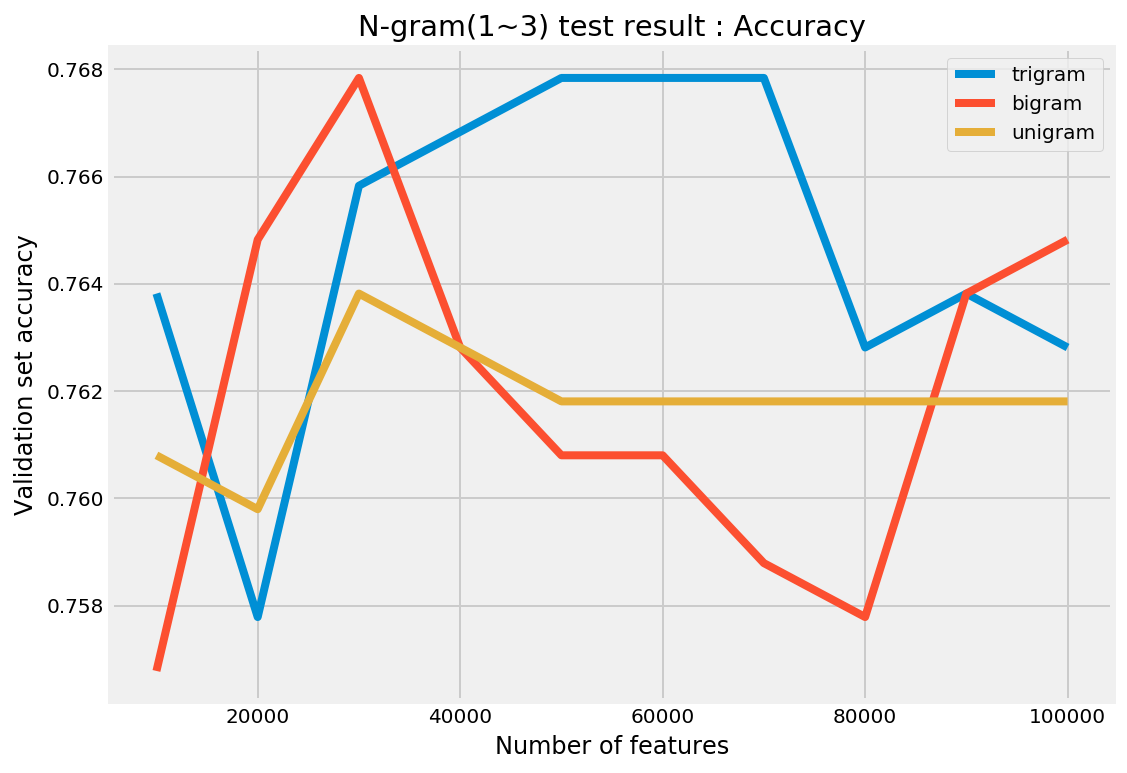

In [100]:
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [101]:
def train_test_and_evaluate(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[0,1]))
    confusion = pd.DataFrame(conmat, index=['negative', 'positive'],
                         columns=['predicted_negative','predicted_positive'])
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("-"*80)
    print ("Confusion Matrix\n")
    print (confusion)
    print ("-"*80)
    print ("Classification Report\n")
    print (classification_report(y_test, y_pred, target_names=['negative','positive']))

In [102]:
%%time
ug_cvec = CountVectorizer(max_features=800000)
ug_pipeline = Pipeline([
        ('vectorizer', ug_cvec),
        ('classifier', lr)
    ])
train_test_and_evaluate(ug_pipeline, x_train, y_train, x_validation, y_validation)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 76.18%
model is 19.50% more accurate than null accuracy
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_negative  predicted_positive
negative                 295                 136
positive                 101                 463
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

    negative       0.74      0.68      0.71       431
    positive       0.77      0.82      0.80       564

    accuracy                           0.76       995
   macro avg       0.76      0.75      0.75       995
weighted avg       0.76      0.76      0.76       995

CPU times: user 11.3 s, sys: 367 ms, total: 11.6 s
Wall time: 8.26 s


In [124]:
%%time
bg_cvec = CountVectorizer(max_features=800000,ngram_range=(1, 2))
bg_pipeline = Pipeline([
        ('vectorizer', bg_cvec),
        ('classifier', lr)
    ])
train_test_and_evaluate(bg_pipeline, x_train, y_train, x_validation, y_validation)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 56.68%
accuracy score: 77.29%
model is 20.60% more accurate than null accuracy
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_negative  predicted_positive
negative                 307                 124
positive                 102                 462
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

    negative       0.75      0.71      0.73       431
    positive       0.79      0.82      0.80       564

    accuracy                           0.77       995
   macro avg       0.77      0.77      0.77       995
weighted avg       0.77      0.77      0.77       995

CPU times: user 27.3 s, sys: 706 ms, total: 28 s
Wall time: 17.1 s
